In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
# from shapely.geometry import Polygon
import os
import datetime
import matplotlib.pyplot as plt
import contextily as cx
import seaborn as sns

In [88]:
import fiona

structure_path = 'Building_SHP/BUILDING_STRUCTURE.shp'
with fiona.open(structure_path) as f:
    gdf_str = gpd.GeoDataFrame.from_features(f, crs=f.crs)
gdf_str.to_crs(epsg=4326, inplace=True)
gdf_str

,geometry,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area
0,"POLYGON ((113.84091 22.21870, 113.84090 22.218...",1,243561,0162608928T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,17.431311,14.453672
1,"POLYGON ((113.84094 22.21863, 113.84095 22.218...",2,243562,0163008922T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,12.960214,9.240269
2,"POLYGON ((113.84090 22.21867, 113.84091 22.218...",3,243563,0163108931T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,22.352643,31.015898
3,"POLYGON ((113.84097 22.21871, 113.84101 22.218...",4,243564,0163608930T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,18.595424,21.319706
4,"POLYGON ((113.84102 22.21870, 113.84101 22.218...",5,243565,0163808933T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,19.609693,20.145564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340747,"POLYGON ((114.43641 22.53999, 114.43638 22.539...",340748,403798,6296144493T20190806,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20190806,20190829,25.017263,39.012734
340748,"POLYGON ((114.43640 22.54116, 114.43640 22.541...",340749,4963,6296144621T20050430,T,9,A,None,None,None,NaN,NaN,10.1,None,NaN,20050430,20050725,34.926430,66.714851
340749,"POLYGON ((114.43668 22.54119, 114.43659 22.541...",340750,4952,6299144635T20050430,T,9,A,None,None,天后宮,NaN,NaN,9.7,None,NaN,20050430,20050725,43.341399,117.309442
340750,"POLYGON ((114.43675 22.54050, 114.43670 22.540...",340751,5040,6299744554T20050430,T,9,A,None,None,None,NaN,NaN,17.5,None,NaN,20050430,20050725,22.022560,29.099489


In [89]:
gdf_strt = gdf_str[gdf_str['BUILDINGST'].isin([159930,160656,160679,160695,160716,160733,163489,163514,163534,163558,164274])]
gdf_strt

,geometry,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area
240175,"POLYGON ((114.16813 22.30726, 114.16825 22.307...",240176,164274,3537018694T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,40.782416,101.187872
240220,"POLYGON ((114.16816 22.30734, 114.16827 22.307...",240221,163558,3537218702T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,41.806072,106.046806
240250,"POLYGON ((114.16816 22.30738, 114.16827 22.307...",240251,163534,3537318709T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,33.463436,47.946933
240267,"POLYGON ((114.16818 22.30741, 114.16828 22.307...",240268,163514,3537418713T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,33.797942,49.515885
240282,"POLYGON ((114.16818 22.30741, 114.16816 22.307...",240283,163489,3537518717T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,34.043476,54.022927
240322,"POLYGON ((114.16818 22.30749, 114.16830 22.307...",240323,160733,3537718721T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,34.101019,54.421895
240340,"POLYGON ((114.16819 22.30753, 114.16831 22.307...",240341,160716,3537818725T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,34.182607,54.976290
240355,"POLYGON ((114.16820 22.30756, 114.16832 22.307...",240356,160695,3537918729T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,34.249991,55.437986
240371,"POLYGON ((114.16822 22.30760, 114.16833 22.307...",240372,160679,3538018734T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,37.375952,56.001211
240391,"POLYGON ((114.16826 22.30763, 114.16834 22.307...",240392,160656,3538118738T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,37.110890,54.754447


<Axes: >

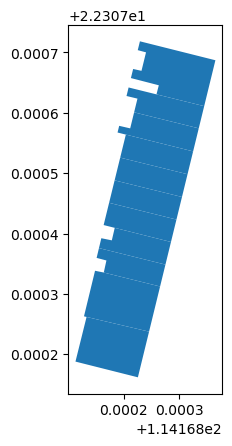

In [57]:
gdf_strt.plot()

In [58]:
import folium
# https://python-visualization.github.io/folium/latest/user_guide/geojson/geojson.html
import geopandas as gpd

# 创建地图中心点坐标
center = [22.3193, 114.1694]  # 香港的纬度和经度

# 创建地图对象
m = folium.Map(location=center, zoom_start=12)

# 将建筑物图层添加到地图上
folium.GeoJson(gdf_strt).add_to(m)

# # 保存地图为HTML文件
# m.save("map.html")

m

In [90]:
gdf_strt_b = gdf_strt.copy()
gdf_strt_b['geometry'] = gdf_strt_b.geometry.buffer(distance=0.0001)
gdf_strt_b

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2904\3782831910.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_strt_b['geometry'] = gdf_strt_b.geometry.buffer(distance=0.0001)


,geometry,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area
240175,"POLYGON ((114.16804 22.30729, 114.16804 22.307...",240176,164274,3537018694T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,40.782416,101.187872
240220,"POLYGON ((114.16818 22.30743, 114.16819 22.307...",240221,163558,3537218702T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,41.806072,106.046806
240250,"POLYGON ((114.16806 22.30740, 114.16806 22.307...",240251,163534,3537318709T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,33.463436,47.946933
240267,"POLYGON ((114.16811 22.30748, 114.16812 22.307...",240268,163514,3537418713T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,33.797942,49.515885
240282,"POLYGON ((114.16816 22.30731, 114.16814 22.307...",240283,163489,3537518717T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,34.043476,54.022927
240322,"POLYGON ((114.16809 22.30751, 114.16809 22.307...",240323,160733,3537718721T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,34.101019,54.421895
240340,"POLYGON ((114.16810 22.30755, 114.16810 22.307...",240341,160716,3537818725T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,34.182607,54.976290
240355,"POLYGON ((114.16811 22.30759, 114.16811 22.307...",240356,160695,3537918729T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,34.249991,55.437986
240371,"POLYGON ((114.16814 22.30767, 114.16814 22.307...",240372,160679,3538018734T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,37.375952,56.001211
240391,"POLYGON ((114.16812 22.30757, 114.16812 22.307...",240392,160656,3538118738T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,37.110890,54.754447


<Axes: >

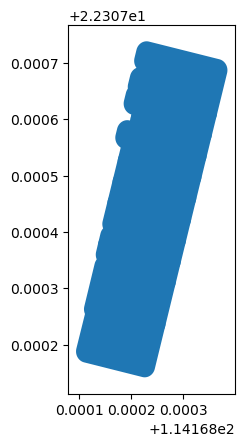

In [69]:
gdf_strt_b.plot()

In [77]:
import folium
# https://python-visualization.github.io/folium/latest/user_guide/geojson/geojson.html
import geopandas as gpd

# 创建地图中心点坐标
center = [22.3193, 114.1694]  # 香港的纬度和经度

# 创建地图对象
m = folium.Map(location=center, zoom_start=12)

# 将建筑物图层添加到地图上
folium.GeoJson(gdf_strt_b).add_to(m)

# # 保存地图为HTML文件
# m.save("map.html")

m

In [79]:
from geopy.distance import geodesic

initial_point = (22.30726,114.16813)
processed_point = (22.30729,114.16804)
geodesic(initial_point, processed_point).meters

9.850511585769128

In [91]:
gdf_strt_count = gdf_strt.head(1)
gdf_strt_count

,geometry,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area
240175,"POLYGON ((114.16813 22.30726, 114.16825 22.307...",240176,164274,3537018694T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,40.782416,101.187872


In [87]:
gdf_strt_count.to_crs('EPSG:2326')

,geometry,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area
240175,"POLYGON ((835367.379 818699.903, 835378.908 81...",240176,164274,3537018694T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,40.782416,101.187872


In [92]:
gdf_strt_b_count = gdf_strt_b.head(1)
gdf_strt_b_count

,geometry,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area
240175,"POLYGON ((114.16804 22.30729, 114.16804 22.307...",240176,164274,3537018694T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,40.782416,101.187872


In [93]:
gdf_strt_b_count.to_crs('EPSG:2326')

,geometry,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area
240175,"POLYGON ((835357.428 818702.776, 835357.728 81...",240176,164274,3537018694T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,40.782416,101.187872


In [106]:
gdf_strt_area = gdf_strt_count.area.values[0]
gdf_strt_b_area = gdf_strt_b_count.area.values[0]
gdf_strt_area = '{:.8f}'.format(gdf_strt_area)
gdf_strt_b_area = '{:.8f}'.format(gdf_strt_b_area)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2904\1916514492.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_strt_area = gdf_strt_count.area.values[0]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2904\1916514492.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_strt_b_area = gdf_strt_b_count.area.values[0]


In [108]:
print("initial:", gdf_strt_area)
print("processed:", gdf_strt_b_area)

initial: 0.00000001
processed: 0.00000008


In [109]:
## 计算面积差距

import fiona

structure_path = 'Building_SHP/BUILDING_STRUCTURE.shp'
with fiona.open(structure_path) as f:
    building_shp = gpd.GeoDataFrame.from_features(f, crs=f.crs)

In [111]:
initial_str = building_shp[building_shp['OBJECTID']==240176]
initial_str

,geometry,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area
240175,"POLYGON ((835367.379 818699.903, 835378.907 81...",240176,164274,3537018694T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,40.782416,101.187872


In [112]:
processed_str = initial_str.copy()
processed_str['geometry'] = processed_str.geometry.buffer(distance=10)
processed_str

,geometry,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area
240175,"POLYGON ((835357.678 818702.328, 835357.959 81...",240176,164274,3537018694T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,40.782416,101.187872


In [116]:
initial_str_area = initial_str.area.values[0]
processed_str_area = processed_str.area.values[0]

In [117]:
print("initial:", initial_str_area)
print("processed:", processed_str_area)

initial: 101.18787182364426
processed: 822.6667716836027


In [120]:
gdf_strt_m = building_shp[building_shp['BUILDINGST'].isin([159930,160656,160679,160695,160716,160733,163489,163514,163534,163558,164274])]
gdf_strt_m['geometry'] = gdf_strt_m.geometry.buffer(distance=10)
gdf_strt_m.to_crs(('EPSG:4326'))


D:\code\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,geometry,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area
240175,"POLYGON ((114.16804 22.30728, 114.16804 22.307...",240176,164274,3537018694T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,40.782416,101.187872
240220,"POLYGON ((114.16818 22.30742, 114.16819 22.307...",240221,163558,3537218702T20050430,T,1,A,None,None,None,6.0,NaN,NaN,None,NaN,20050430,20060817,41.806072,106.046806
240250,"POLYGON ((114.16806 22.30740, 114.16806 22.307...",240251,163534,3537318709T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,33.463436,47.946933
240267,"POLYGON ((114.16811 22.30747, 114.16812 22.307...",240268,163514,3537418713T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,33.797942,49.515885
240282,"POLYGON ((114.16816 22.30732, 114.16814 22.307...",240283,163489,3537518717T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,34.043476,54.022927
240322,"POLYGON ((114.16809 22.30751, 114.16809 22.307...",240323,160733,3537718721T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,34.101019,54.421895
240340,"POLYGON ((114.16810 22.30755, 114.16810 22.307...",240341,160716,3537818725T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,34.182607,54.976290
240355,"POLYGON ((114.16811 22.30759, 114.16811 22.307...",240356,160695,3537918729T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,34.249991,55.437986
240371,"POLYGON ((114.16814 22.30766, 114.16815 22.307...",240372,160679,3538018734T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210510,37.375952,56.001211
240391,"POLYGON ((114.16813 22.30758, 114.16812 22.307...",240392,160656,3538118738T20050430,T,1,A,None,None,None,NaN,NaN,NaN,None,NaN,20050430,20210727,37.110890,54.754447


In [121]:
import folium
# https://python-visualization.github.io/folium/latest/user_guide/geojson/geojson.html
import geopandas as gpd

# 创建地图中心点坐标
center = [22.3193, 114.1694]  # 香港的纬度和经度

# 创建地图对象
m = folium.Map(location=center, zoom_start=12)

# 将建筑物图层添加到地图上
folium.GeoJson(gdf_strt_m).add_to(m)

# # 保存地图为HTML文件
# m.save("map.html")

m

In [2]:
df = pd.read_csv('process data/dataset_all.csv')

In [ ]:
# import datetime
# df['date'] = pd.to_datetime(df['date'])
# # df_dataset3_15 = df_dataset3[(df_dataset3['date'].dt.hour >= 1) & (df_dataset3['date'].dt.hour <= 5)] # 凌晨1：00至3：59的数据


In [3]:
df[df['device_id']=='000976e6-c4ca-662c-1022-8bafbe934242']

,device_id,latitude,longitude,timestamp,device_home_latitude,device_home_longitude,device_work_latitude,device_work_longitude,location_type,price_sqft_home,price_sqft_location,date
3269983,000976e6-c4ca-662c-1022-8bafbe934242,22.316682,114.166681,1693692303,\N,\N,\N,\N,pofw-muslim,\N,\N,2023-09-03 06:05:03
3269984,000976e6-c4ca-662c-1022-8bafbe934242,22.316682,114.166681,1693692706,\N,\N,\N,\N,pofw-muslim,\N,\N,2023-09-03 06:11:46
3269985,000976e6-c4ca-662c-1022-8bafbe934242,22.316682,114.166681,1693693748,\N,\N,\N,\N,pofw-muslim,\N,\N,2023-09-03 06:29:08
3269986,000976e6-c4ca-662c-1022-8bafbe934242,22.316685,114.166601,1693697273,\N,\N,\N,\N,pofw-muslim,\N,\N,2023-09-03 07:27:53
3269987,000976e6-c4ca-662c-1022-8bafbe934242,22.316685,114.166601,1693697810,\N,\N,\N,\N,pofw-muslim,\N,\N,2023-09-03 07:36:50
3269988,000976e6-c4ca-662c-1022-8bafbe934242,22.316685,114.166601,1693698241,\N,\N,\N,\N,pofw-muslim,\N,\N,2023-09-03 07:44:01
3634623,000976e6-c4ca-662c-1022-8bafbe934242,22.316682,114.166681,1693585218,\N,\N,\N,\N,pofw-muslim,\N,\N,2023-09-02 00:20:18
3634624,000976e6-c4ca-662c-1022-8bafbe934242,22.316682,114.166681,1693589949,\N,\N,\N,\N,pofw-muslim,\N,\N,2023-09-02 01:39:09
3634625,000976e6-c4ca-662c-1022-8bafbe934242,22.316682,114.166681,1693596424,\N,\N,\N,\N,pofw-muslim,\N,\N,2023-09-02 03:27:04
3634626,000976e6-c4ca-662c-1022-8bafbe934242,22.316682,114.166681,1693596839,\N,\N,\N,\N,pofw-muslim,\N,\N,2023-09-02 03:33:59
